Lab-01

Ở bài thực hành đầu tiên này chúng ta sẽ làm quen với cách thức một neural network hoạt động. Thường sẽ có nhiều loại mã nguồn mở cho deep learning tiêu biểu là Tensorflow và Pytorch. Trong suốt quá trình học chúng ta sẽ thực hành trên Keras một thư viện high-level với phần low-level là Tensorflow

In [ ]:
#Thư viện
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
sklearn.model_selection.train_test_split()

In [ ]:
#xem mình đang dùng tensorflow version mấy 
tf.__version__

'2.6.0'

Chúng ta sẽ làm quen với tập dữ liệu fashion_mnist. Đây là một tập dữ liệu bao gồm hình ảnh về quần áo, với mỗi ảnh gồm 3 kênh màu có giá trị pixel từ 0 đến 255.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images ,test_labels)=fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#chia tập train ra thành 2 tập train và validation
train_images, valid_images, train_labels,valid_labels = train_test_split(train_images, train_labels, 
                                                                          random_state=0,
                                                                          test_size=0.1)

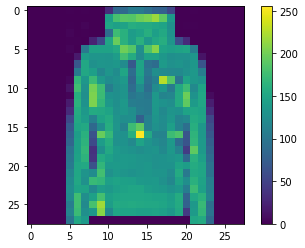

In [ ]:
#Vẽ hình ra xem thử
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
Input = tf.keras.layers.Input(shape=(28,28)) # Định nghĩa input shape cho model
Flatten = tf.keras.layers.Flatten()(Input)   # Duỗi thẳng ảnh ra thành 1 vector
Dense1 = tf.keras.layers.Dense(units=600, activation="relu")(Flatten) # Định nghĩa số node cho lớp FC, dùng activation là relu
Dense2 = tf.keras.layers.Dense(units=300, activation="relu")(Dense1)
Output = tf.keras.layers.Dense(units=len(np.unique(train_labels)), activation="softmax")(Dense2) # Đây là lớp classifier của model, với số nodes đúng bằng số labels 

model=tf.keras.models.Model(inputs=Input, outputs=Output) 

In [ ]:
#In thử model ra để xem cấu trúc
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_25 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                3010      
Total params: 654,310
Trainable params: 654,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD, loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=["accuracy"])
#optimizer là chọn optimizer cho model
#loss là chọn loss function cho model
#metrics là chọn metrics cho model

In [ ]:
history=model.fit(x=train_images, y=train_labels,
                  epochs=20,
                  verbose=1,
                  validation_data=(valid_images,valid_labels))

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 2.6164 - accuracy: 0.7669 - val_loss: 0.5433 - val_accuracy: 0.8158
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5364 - accuracy: 0.8152 - val_loss: 0.5075 - val_accuracy: 0.8212
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4717 - accuracy: 0.8322 - val_loss: 0.3993 - val_accuracy: 0.8553
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4301 - accuracy: 0.8466 - val_loss: 0.4375 - val_accuracy: 0.8430
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4043 - accuracy: 0.8545 - val_loss: 0.4710 - val_accuracy: 0.8347
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3942 - accuracy: 0.8577 - val_loss: 0.3863 - val_accuracy: 0.8640
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3812 - accuracy: 0.8623 - val_loss: 0.3948 - val_accuracy:

In [ ]:
#Xem độ chính xác trên tập test
evaluation=model.evaluate(test_images, test_labels)
print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 2ms/step - loss: 0.5153 - accuracy: 0.8541
Model có độ chính xác là 0.8540999889373779 và loss là 0.5153272747993469


#Bài tập
1. Hãy tạo một model có cấu trúc sau và train thử:
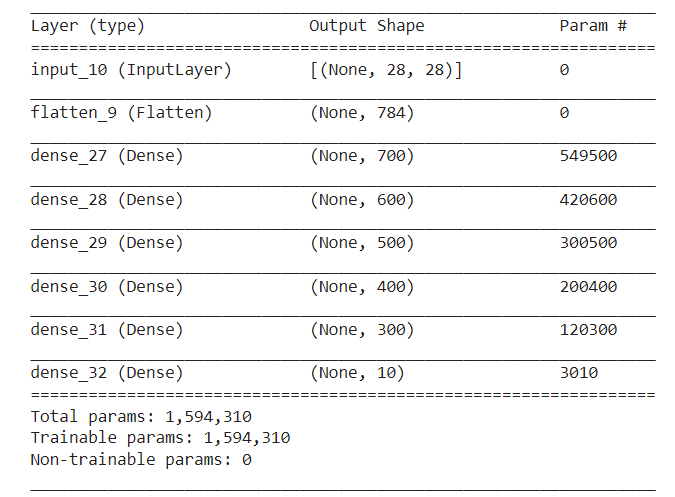
2. Nêu cách tính số Param # 
3. Tính độ chính xác trên tập test